In [130]:
from __future__ import print_function


import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

import nltk
import sklearn

from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

# Classifiers
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



from sklearn.model_selection import GridSearchCV

# Model metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve


%matplotlib inline


In [2]:
from nltk.collocations import *



In [3]:
# df=pd.read_csv('train-file.csv')
# df = df.sample(frac=1).reset_index(drop=True)
# # df.to_csv('train-reshuffled.csv')

df=pd.read_csv('train-reshuffled.csv')

df.head(10)

id  label                                              tweet
0  29727      0  sad to see the scenes of hooligans pre #engrus...
1  14466      0  #gooddyeyoung #yoyoyo  !! super happy to be ap...
2  18194      0  queen evil's bihdayð#lnic #lnicjustanevilbd...
3  18283      1  @user you might be a libtard if... #libtard  #...
4  25845      0  what are your goals? find out here...   #smile...
5  14297      0                         retweets @user #nuascannan
6  14016      0                          a classic trump follower.
7   7009      0  in the mixture of emotions, here's a   one fro...
8  18926      0  @user the meps bear that travelled to sandy ho...
9  28292      0  just because it affected her son?   sonâs ab...

In [4]:
df.tweet[0]

'sad to see the scenes of hooligans pre #engrus why spoil the pay!!! #euro2016'

In [5]:
df.shape

(31962, 3)

In [6]:
df_10=df[0:10]
df_10.head()

id  label                                              tweet
0  29727      0  sad to see the scenes of hooligans pre #engrus...
1  14466      0  #gooddyeyoung #yoyoyo  !! super happy to be ap...
2  18194      0  queen evil's bihdayð#lnic #lnicjustanevilbd...
3  18283      1  @user you might be a libtard if... #libtard  #...
4  25845      0  what are your goals? find out here...   #smile...

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [8]:
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")


In [9]:
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


In [10]:
df['tidy_tweet']= df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [11]:
df.head()

id  label                                              tweet  \
0  29727      0  sad to see the scenes of hooligans pre #engrus...   
1  14466      0  #gooddyeyoung #yoyoyo  !! super happy to be ap...   
2  18194      0  queen evil's bihdayð#lnic #lnicjustanevilbd...   
3  18283      1  @user you might be a libtard if... #libtard  #...   
4  25845      0  what are your goals? find out here...   #smile...   

                                          tidy_tweet  
0               scenes hooligans #engrus spoil #euro  
1         #gooddyeyoung #yoyoyo super happy movement  
2  queen evil bihday #lnic #lnicjustanevilbday #b...  
3     might libtard #libtard #sjw #liberal #politics  
4                   what your goals find here #smile

In [12]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet_meta=tokenized_tweet.copy()

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet_meta[i] = ' '.join(tokenized_tweet_meta[i])

df['tidy_tweet_2'] = tokenized_tweet_meta
df.head()

id  label                                              tweet  \
0  29727      0  sad to see the scenes of hooligans pre #engrus...   
1  14466      0  #gooddyeyoung #yoyoyo  !! super happy to be ap...   
2  18194      0  queen evil's bihdayð#lnic #lnicjustanevilbd...   
3  18283      1  @user you might be a libtard if... #libtard  #...   
4  25845      0  what are your goals? find out here...   #smile...   

                                          tidy_tweet  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                        tidy_tweet_2  
0               scenes hooligans #engrus spoil #euro  
1         #gooddyeyoung #yoyoyo super happy movement  
2  queen evil bihday #lnic #lnicjustanevilbday #b...  
3     might libtard #libtard #sjw #liberal #politics  
4                   what your goals find here #smile

In [14]:
df['tokenized_tweet']=tokenized_tweet
df.head()

id  label                                              tweet  \
0  29727      0  sad to see the scenes of hooligans pre #engrus...   
1  14466      0  #gooddyeyoung #yoyoyo  !! super happy to be ap...   
2  18194      0  queen evil's bihdayð#lnic #lnicjustanevilbd...   
3  18283      1  @user you might be a libtard if... #libtard  #...   
4  25845      0  what are your goals? find out here...   #smile...   

                                          tidy_tweet  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                        tidy_tweet_2  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                     tokenized_tweet  
0         [scenes, hooligans, #engrus, spoil, #euro]  
1   [#gooddyeyoung, #yoyoyo, super, happy, movement]  
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...  
3  [might, libtard, #libtard, #sjw, #liberal, #po...  
4            [what, your, goals, find, here, #smile]

In [15]:
stemmer = SnowballStemmer("english")
stemmed_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
stemmed_tweet.head()


0             [scene, hooligan, #engrus, spoil, #euro]
1     [#gooddyeyoung, #yoyoyo, super, happi, movement]
2    [queen, evil, bihday, #lnic, #lnicjustanevilbd...
3     [might, libtard, #libtard, #sjw, #liber, #polit]
4               [what, your, goal, find, here, #smile]
Name: tidy_tweet, dtype: object

In [16]:
stemmed_tweet[0]

['scene', 'hooligan', '#engrus', 'spoil', '#euro']

In [17]:
stemmed_tweet[0][0]

'scene'

In [18]:
df['stemmed_tweet']=stemmed_tweet

In [19]:
df.label.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [20]:
df_0=df[df['label']==0]
df_0.head()

id  label                                              tweet  \
0  29727      0  sad to see the scenes of hooligans pre #engrus...   
1  14466      0  #gooddyeyoung #yoyoyo  !! super happy to be ap...   
2  18194      0  queen evil's bihdayð#lnic #lnicjustanevilbd...   
4  25845      0  what are your goals? find out here...   #smile...   
5  14297      0                         retweets @user #nuascannan   

                                          tidy_tweet  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
4                   what your goals find here #smile   
5                               retweets #nuascannan   

                                        tidy_tweet_2  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
4                   what your goals find here #smile   
5                               retweets #nuascannan   

                                     tokenized_tweet  \
0         [scenes, hooligans, #engrus, spoil, #euro]   
1   [#gooddyeyoung, #yoyoyo, super, happy, movement]   
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...   
4            [what, your, goals, find, here, #smile]   
5                            [retweets, #nuascannan]   

                                       stemmed_tweet  
0           [scene, hooligan, #engrus, spoil, #euro]  
1   [#gooddyeyoung, #yoyoyo, super, happi, movement]  
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...  
4             [what, your, goal, find, here, #smile]  
5                             [retweet, #nuascannan]

In [21]:
df_1= df[df['label']==1]
df_1.head()

id  label                                              tweet  \
3   18283      1  @user you might be a libtard if... #libtard  #...   
22  18207      1  rise up today is out!  stories of police bruta...   
33  20139      1  @user ouch woow! @user @user #sexy @user @user...   
37  14894      1  "vandals turned a jewish family's menorah into...   
44  24776      1  "the reality is that the tech industry is made...   

                                           tidy_tweet  \
3      might libtard #libtard #sjw #liberal #politics   
22   rise today stories police brutality from #police   
33                                    ouch woow #sexy   
37  vandals turned jewish family menorah into swas...   
44  reality that tech industry made regular people...   

                                         tidy_tweet_2  \
3      might libtard #libtard #sjw #liberal #politics   
22   rise today stories police brutality from #police   
33                                    ouch woow #sexy   
37  vandals turned jewish family menorah into swas...   
44  reality that tech industry made regular people...   

                                      tokenized_tweet  \
3   [might, libtard, #libtard, #sjw, #liberal, #po...   
22  [rise, today, stories, police, brutality, from...   
33                                [ouch, woow, #sexy]   
37  [vandals, turned, jewish, family, menorah, int...   
44  [reality, that, tech, industry, made, regular,...   

                                        stemmed_tweet  
3    [might, libtard, #libtard, #sjw, #liber, #polit]  
22  [rise, today, stori, polic, brutal, from, #polic]  
33                                [ouch, woow, #sexi]  
37  [vandal, turn, jewish, famili, menorah, into, ...  
44  [realiti, that, tech, industri, made, regular,...

In [22]:
# from PIL import Image
# cloud_mask = np.array(Image.open("twitter.png"))
# cloud_mask

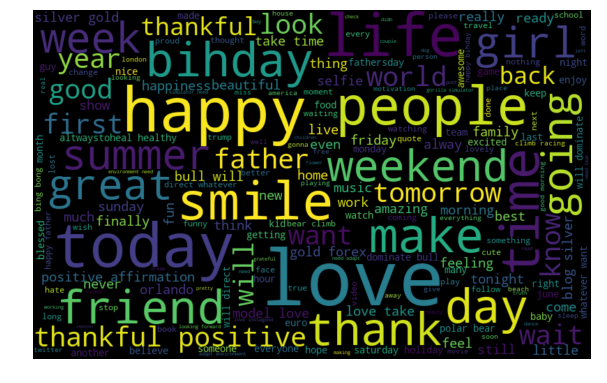

In [23]:
from wordcloud import WordCloud

df_0_words = ' '.join([text for text in df['tidy_tweet_2'][df['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(df_0_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
df_0_words

'scenes hooligans #engrus spoil #euro #gooddyeyoung #yoyoyo super happy movement queen evil bihday #lnic #lnicjustanevilbday #bihday #suit #evil #love #yolo #stoops #seriously what your goals find here #smile retweets #nuascannan classic trump follower mixture emotions here from weekend #pride meps bear that travelled sandy hook with hope that another massacre would never occur again just because affected abuse prompts angela kennedy change stance thomas always says live dream world this real life just might seem like dream others life #blessed when local library tries charge once again fees already paid twice before #ineedtosavethereceipt #frustrated #cia #ncs #sockpuppetarmy #hbgary troll #snowden their #sop logical fallacies saying year anniversary michael jackson vindication #the happiest michael jackson fans over everyone that says cringe cool amirite #twitch ontwitch #gaming #rant good morning #life #blackhair #travel #home #cheltenham #hamburg #hamburgcity #london talk food ever

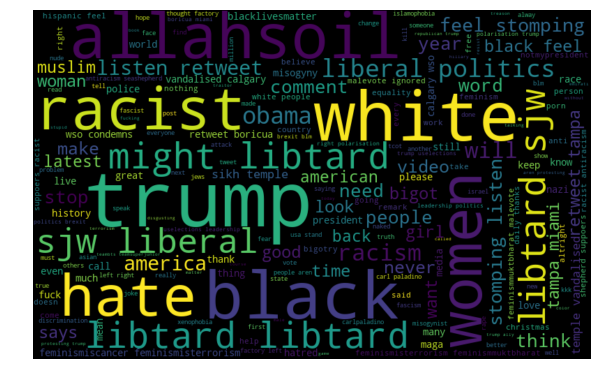

In [25]:
from wordcloud import WordCloud

df_1_words = ' '.join([text for text in df['tidy_tweet_2'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(df_1_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [26]:
df_1_words

'might libtard #libtard #sjw #liberal #politics rise today stories police brutality from #police ouch woow #sexy vandals turned jewish family menorah into swastika #antisemitism #hate reality that tech industry made regular people #tech #discrimination ways #facebook #repoingsystem fails #communitystandards users #blacklivesmatter prison officers goaded #muslim inmates until they needed restrained game have love some even against #mexicans #lmao latest science daily thanks trump real estate buddy carl paladino wishes obama dead disease that systemic rather than just humanity being human power reinforced each minute unamerican #fact your people would have died scurvy their first winter first nations hadn shown them cute #feminismiscancer #feminismisterrorism #feminismmuktbharat #malevote ignored invited help actions #peace #povey sept #feminismiscancer #feminismisterrorism #feminismmuktbharat #malevote ignored #black feel like stomping listen #retweet #tampa #miami must said #trump vote

In [27]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [28]:
# extracting hashtags from non racist/sexist tweets
HT_0 = hashtag_extract(df['tidy_tweet_2'][df['label']==0])

# extracting hashtags from racist/sexist tweets
HT_1 = hashtag_extract(df['tidy_tweet_2'][df['label']==1])


In [29]:
HT_0

[['engrus', 'euro'],
 ['gooddyeyoung', 'yoyoyo'],
 ['lnic',
  'lnicjustanevilbday',
  'bihday',
  'suit',
  'evil',
  'love',
  'yolo',
  'stoops',
  'seriously'],
 ['smile'],
 ['nuascannan'],
 [],
 ['pride'],
 [],
 [],
 ['blessed'],
 ['ineedtosavethereceipt', 'frustrated'],
 ['cia', 'ncs', 'sockpuppetarmy', 'hbgary', 'snowden', 'sop'],
 ['the'],
 ['twitch', 'gaming', 'rant'],
 ['life',
  'blackhair',
  'travel',
  'home',
  'cheltenham',
  'hamburg',
  'hamburgcity',
  'london'],
 ['everycharactermatters'],
 ['lightroom'],
 ['udtapunjab', 'amarinder', 'aap'],
 [],
 ['love',
  'nature',
  'beauty',
  'garden',
  'outdoors',
  'pretty',
  'cute',
  'lovely',
  'beautiful',
  'fun',
  'water',
  'sun',
  'life',
  'inst'],
 [],
 ['pretty'],
 ['bigbiz', 'venezuela'],
 ['sacs',
  'photooftheday',
  'music',
  'instamood',
  'photography',
  'instadaily',
  'nike',
  'family',
  'design'],
 [],
 ['fun',
  'bekindalways',
  'animation',
  'bekindtoanimals',
  'recycling',
  'forests'],
 [],


In [30]:
# unnesting lists
HT_0 = sum(HT_0,[])
HT_1 = sum(HT_1,[])

In [31]:
HT_0

['engrus',
 'euro',
 'gooddyeyoung',
 'yoyoyo',
 'lnic',
 'lnicjustanevilbday',
 'bihday',
 'suit',
 'evil',
 'love',
 'yolo',
 'stoops',
 'seriously',
 'smile',
 'nuascannan',
 'pride',
 'blessed',
 'ineedtosavethereceipt',
 'frustrated',
 'cia',
 'ncs',
 'sockpuppetarmy',
 'hbgary',
 'snowden',
 'sop',
 'the',
 'twitch',
 'gaming',
 'rant',
 'life',
 'blackhair',
 'travel',
 'home',
 'cheltenham',
 'hamburg',
 'hamburgcity',
 'london',
 'everycharactermatters',
 'lightroom',
 'udtapunjab',
 'amarinder',
 'aap',
 'love',
 'nature',
 'beauty',
 'garden',
 'outdoors',
 'pretty',
 'cute',
 'lovely',
 'beautiful',
 'fun',
 'water',
 'sun',
 'life',
 'inst',
 'pretty',
 'bigbiz',
 'venezuela',
 'sacs',
 'photooftheday',
 'music',
 'instamood',
 'photography',
 'instadaily',
 'nike',
 'family',
 'design',
 'fun',
 'bekindalways',
 'animation',
 'bekindtoanimals',
 'recycling',
 'forests',
 'puppy',
 'cute',
 'morning',
 'breakfast',
 'yum',
 'foodporn',
 'greece',
 'firstcoffee',
 'milos',


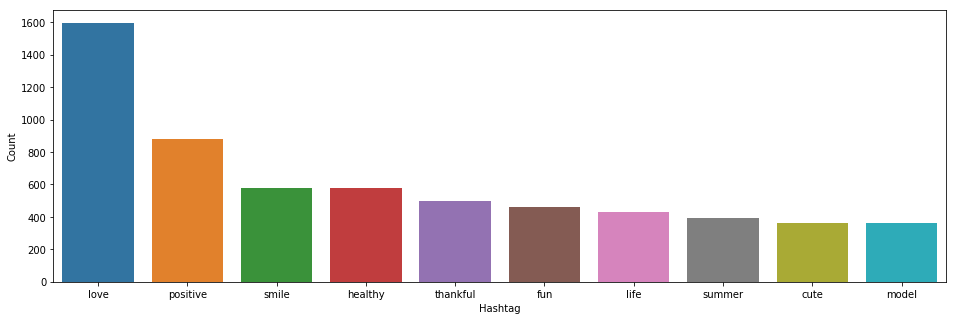

In [32]:
a = nltk.FreqDist(HT_0)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

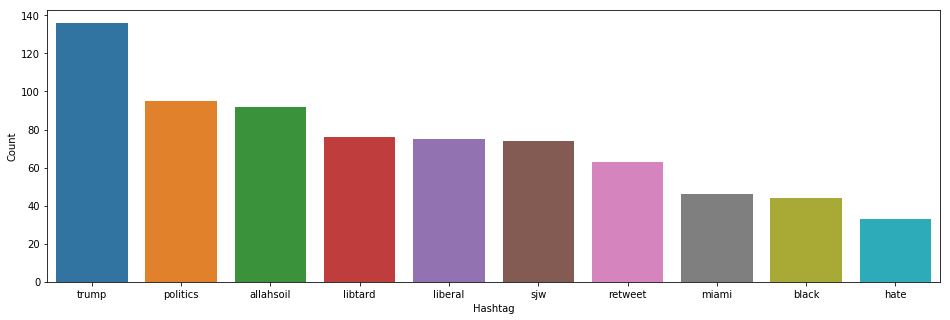

In [33]:
b = nltk.FreqDist(HT_1)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [34]:
meta_freqdist = FreqDist(HT_1)
meta_freqdist.most_common(10)

[('trump', 136),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 33)]

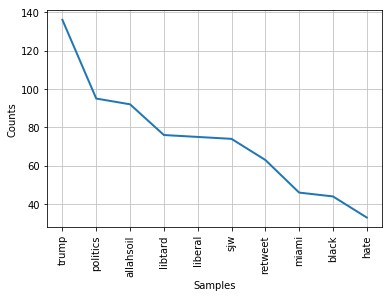

In [35]:
meta_freqdist.plot(10,cumulative=False)

In [36]:
meta_freqdist = FreqDist(HT_0)
meta_freqdist.most_common(10)

[('love', 1596),
 ('positive', 880),
 ('smile', 581),
 ('healthy', 576),
 ('thankful', 496),
 ('fun', 463),
 ('life', 431),
 ('summer', 395),
 ('cute', 365),
 ('model', 365)]

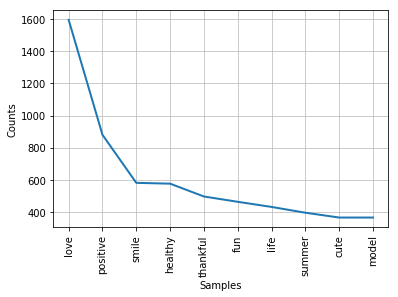

In [37]:
meta_freqdist.plot(10,cumulative=False)

## Bigram

In [38]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
meta_finder = BigramCollocationFinder.from_words(df['tidy_tweet_2'])


In [39]:
bigram_scored = meta_finder.score_ngrams(bigram_measures.raw_freq)


In [40]:
bigram_scored

[(('#model love take with time', '#model love take with time'),
  0.00012514861397910017),
 (('might libtard #libtard #sjw #liberal #politics',
   'finally found delete tweets might find useful well #deletetweets'),
  9.386146048432514e-05),
 (('#model love take with time', '#grateful that #affirmations'),
  6.257430698955009e-05),
 (('#model love take with time', 'thankful #thankful #positive'),
  6.257430698955009e-05),
 (('#parente bull will dominate your bull will direct whatever want when',
   '#model love take with time'),
  6.257430698955009e-05),
 (('finally found delete tweets might find useful well #deletetweets',
   '#vehicle gorilla simulator need adapt environment need tear city materia'),
  6.257430698955009e-05),
 (('personalised here #shop #cool #home #fun', '#model love take with time'),
  6.257430698955009e-05),
 (('thankful tears #thankful #positive', '#model love take with time'),
  6.257430698955009e-05),
 (('', '#cover #reveal swiftly sharpens fang #radicalisation

In [41]:
stemmed_tweet_meta=stemmed_tweet.copy()

In [42]:
for i in range(len(stemmed_tweet_meta)):
    stemmed_tweet_meta[i] = ' '.join(stemmed_tweet_meta[i])

df['stemmed_tweet_meta'] = stemmed_tweet_meta
df.head()

id  label                                              tweet  \
0  29727      0  sad to see the scenes of hooligans pre #engrus...   
1  14466      0  #gooddyeyoung #yoyoyo  !! super happy to be ap...   
2  18194      0  queen evil's bihdayð#lnic #lnicjustanevilbd...   
3  18283      1  @user you might be a libtard if... #libtard  #...   
4  25845      0  what are your goals? find out here...   #smile...   

                                          tidy_tweet  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                        tidy_tweet_2  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                     tokenized_tweet  \
0         [scenes, hooligans, #engrus, spoil, #euro]   
1   [#gooddyeyoung, #yoyoyo, super, happy, movement]   
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...   
3  [might, libtard, #libtard, #sjw, #liberal, #po...   
4            [what, your, goals, find, here, #smile]   

                                       stemmed_tweet  \
0           [scene, hooligan, #engrus, spoil, #euro]   
1   [#gooddyeyoung, #yoyoyo, super, happi, movement]   
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...   
3   [might, libtard, #libtard, #sjw, #liber, #polit]   
4             [what, your, goal, find, here, #smile]   

                                  stemmed_tweet_meta  
0                 scene hooligan #engrus spoil #euro  
1         #gooddyeyoung #yoyoyo super happi movement  
2  queen evil bihday #lnic #lnicjustanevilbday #b...  
3          might libtard #libtard #sjw #liber #polit  
4                    what your goal find here #smile

## Lemmitization 

In [43]:
df.tidy_tweet_2.head(20)

0                  scenes hooligans #engrus spoil #euro
1            #gooddyeyoung #yoyoyo super happy movement
2     queen evil bihday #lnic #lnicjustanevilbday #b...
3        might libtard #libtard #sjw #liberal #politics
4                      what your goals find here #smile
5                                  retweets #nuascannan
6                                classic trump follower
7             mixture emotions here from weekend #pride
8     meps bear that travelled sandy hook with hope ...
9     just because affected abuse prompts angela ken...
10    thomas always says live dream world this real ...
11    when local library tries charge once again fee...
12    #cia #ncs #sockpuppetarmy #hbgary troll #snowd...
13    year anniversary michael jackson vindication #...
14    over everyone that says cringe cool amirite #t...
15    good morning #life #blackhair #travel #home #c...
16         talk food every month #everycharactermatters
17    #lightroom bull will dominate your bull wi

In [44]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatized_tweet = [lemmatizer.lemmatize(word) for word in df.tidy_tweet_2]
print(lemmatized_tweet)


['scenes hooligans #engrus spoil #euro', '#gooddyeyoung #yoyoyo super happy movement', 'queen evil bihday #lnic #lnicjustanevilbday #bihday #suit #evil #love #yolo #stoops #seriously', 'might libtard #libtard #sjw #liberal #politics', 'what your goals find here #smile', 'retweets #nuascannan', 'classic trump follower', 'mixture emotions here from weekend #pride', 'meps bear that travelled sandy hook with hope that another massacre would never occur again', 'just because affected abuse prompts angela kennedy change stance', 'thomas always says live dream world this real life just might seem like dream others life #blessed', 'when local library tries charge once again fees already paid twice before #ineedtosavethereceipt #frustrated', '#cia #ncs #sockpuppetarmy #hbgary troll #snowden their #sop logical fallacies saying', 'year anniversary michael jackson vindication #the happiest michael jackson fans', 'over everyone that says cringe cool amirite #twitch ontwitch #gaming #rant', 'good mo

In [45]:
print(lemmatizer.lemmatize('studies'))

study


In [46]:
df['lemmatized_tweet']=lemmatized_tweet
df['lemmatized_tweet'].head()

0                 scenes hooligans #engrus spoil #euro
1           #gooddyeyoung #yoyoyo super happy movement
2    queen evil bihday #lnic #lnicjustanevilbday #b...
3       might libtard #libtard #sjw #liberal #politics
4                     what your goals find here #smile
Name: lemmatized_tweet, dtype: object

In [47]:
df.head()

id  label                                              tweet  \
0  29727      0  sad to see the scenes of hooligans pre #engrus...   
1  14466      0  #gooddyeyoung #yoyoyo  !! super happy to be ap...   
2  18194      0  queen evil's bihdayð#lnic #lnicjustanevilbd...   
3  18283      1  @user you might be a libtard if... #libtard  #...   
4  25845      0  what are your goals? find out here...   #smile...   

                                          tidy_tweet  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                        tidy_tweet_2  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                     tokenized_tweet  \
0         [scenes, hooligans, #engrus, spoil, #euro]   
1   [#gooddyeyoung, #yoyoyo, super, happy, movement]   
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...   
3  [might, libtard, #libtard, #sjw, #liberal, #po...   
4            [what, your, goals, find, here, #smile]   

                                       stemmed_tweet  \
0           [scene, hooligan, #engrus, spoil, #euro]   
1   [#gooddyeyoung, #yoyoyo, super, happi, movement]   
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...   
3   [might, libtard, #libtard, #sjw, #liber, #polit]   
4             [what, your, goal, find, here, #smile]   

                                  stemmed_tweet_meta  \
0                 scene hooligan #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happi movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3          might libtard #libtard #sjw #liber #polit   
4                    what your goal find here #smile   

                                    lemmatized_tweet  
0               scenes hooligans #engrus spoil #euro  
1         #gooddyeyoung #yoyoyo super happy movement  
2  queen evil bihday #lnic #lnicjustanevilbday #b...  
3     might libtard #libtard #sjw #liberal #politics  
4                   what your goals find here #smile

## Train / Test Split for TF-IDF

In [48]:
df.head()

id  label                                              tweet  \
0  29727      0  sad to see the scenes of hooligans pre #engrus...   
1  14466      0  #gooddyeyoung #yoyoyo  !! super happy to be ap...   
2  18194      0  queen evil's bihdayð#lnic #lnicjustanevilbd...   
3  18283      1  @user you might be a libtard if... #libtard  #...   
4  25845      0  what are your goals? find out here...   #smile...   

                                          tidy_tweet  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                        tidy_tweet_2  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                     tokenized_tweet  \
0         [scenes, hooligans, #engrus, spoil, #euro]   
1   [#gooddyeyoung, #yoyoyo, super, happy, movement]   
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...   
3  [might, libtard, #libtard, #sjw, #liberal, #po...   
4            [what, your, goals, find, here, #smile]   

                                       stemmed_tweet  \
0           [scene, hooligan, #engrus, spoil, #euro]   
1   [#gooddyeyoung, #yoyoyo, super, happi, movement]   
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...   
3   [might, libtard, #libtard, #sjw, #liber, #polit]   
4             [what, your, goal, find, here, #smile]   

                                  stemmed_tweet_meta  \
0                 scene hooligan #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happi movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3          might libtard #libtard #sjw #liber #polit   
4                    what your goal find here #smile   

                                    lemmatized_tweet  
0               scenes hooligans #engrus spoil #euro  
1         #gooddyeyoung #yoyoyo super happy movement  
2  queen evil bihday #lnic #lnicjustanevilbday #b...  
3     might libtard #libtard #sjw #liberal #politics  
4                   what your goals find here #smile

In [49]:
X = df.drop(['label'], axis = 1)

In [50]:
X.head()

id                                              tweet  \
0  29727  sad to see the scenes of hooligans pre #engrus...   
1  14466  #gooddyeyoung #yoyoyo  !! super happy to be ap...   
2  18194  queen evil's bihdayð#lnic #lnicjustanevilbd...   
3  18283  @user you might be a libtard if... #libtard  #...   
4  25845  what are your goals? find out here...   #smile...   

                                          tidy_tweet  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                        tidy_tweet_2  \
0               scenes hooligans #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happy movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3     might libtard #libtard #sjw #liberal #politics   
4                   what your goals find here #smile   

                                     tokenized_tweet  \
0         [scenes, hooligans, #engrus, spoil, #euro]   
1   [#gooddyeyoung, #yoyoyo, super, happy, movement]   
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...   
3  [might, libtard, #libtard, #sjw, #liberal, #po...   
4            [what, your, goals, find, here, #smile]   

                                       stemmed_tweet  \
0           [scene, hooligan, #engrus, spoil, #euro]   
1   [#gooddyeyoung, #yoyoyo, super, happi, movement]   
2  [queen, evil, bihday, #lnic, #lnicjustanevilbd...   
3   [might, libtard, #libtard, #sjw, #liber, #polit]   
4             [what, your, goal, find, here, #smile]   

                                  stemmed_tweet_meta  \
0                 scene hooligan #engrus spoil #euro   
1         #gooddyeyoung #yoyoyo super happi movement   
2  queen evil bihday #lnic #lnicjustanevilbday #b...   
3          might libtard #libtard #sjw #liber #polit   
4                    what your goal find here #smile   

                                    lemmatized_tweet  
0               scenes hooligans #engrus spoil #euro  
1         #gooddyeyoung #yoyoyo super happy movement  
2  queen evil bihday #lnic #lnicjustanevilbday #b...  
3     might libtard #libtard #sjw #liberal #politics  
4                   what your goals find here #smile

In [51]:
y = df['label']
y

0        0
1        0
2        0
3        1
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       1
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
31932    0
31933    0
31934    1
31935    0
31936    0
31937    0
31938    0
31939    0
31940    1
31941    0
31942    0
31943    0
31944    0
31945    0
31946    0
31947    1
31948    0
31949    0
31950    0
31951    0
31952    0
31953    0
31954    1
31955    0
31956    0
31957    1
31958    0
31959    1
31960    0
31961    1
Name: label, Length: 31962, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(X, y, stratify = y,  test_size=0.20, random_state=123)

#splitting "model" into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

### TF-IDF VECTORIZATION

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
df.tidy_tweet_2.head(20)

0                  scenes hooligans #engrus spoil #euro
1            #gooddyeyoung #yoyoyo super happy movement
2     queen evil bihday #lnic #lnicjustanevilbday #b...
3        might libtard #libtard #sjw #liberal #politics
4                      what your goals find here #smile
5                                  retweets #nuascannan
6                                classic trump follower
7             mixture emotions here from weekend #pride
8     meps bear that travelled sandy hook with hope ...
9     just because affected abuse prompts angela ken...
10    thomas always says live dream world this real ...
11    when local library tries charge once again fee...
12    #cia #ncs #sockpuppetarmy #hbgary troll #snowd...
13    year anniversary michael jackson vindication #...
14    over everyone that says cringe cool amirite #t...
15    good morning #life #blackhair #travel #home #c...
16         talk food every month #everycharactermatters
17    #lightroom bull will dominate your bull wi

In [55]:
# def tfidf_vectorizer (dataframe, tweet_to_vectorize, vectorizer, fit_or_transform):
    
#     tfidf_vectorizer = vectorizer
    
#     if (fit_or_transform == True):
#         train_tfidf = tfidf_vectorizer.fit_transform(tweet_to_vectorize)
#         print ('The shape of the train TFIDF is: {}'.format(train_tfidf.shape))
#         return tfidf_vectorizer.vocabulary_
#     else:
#         test_tfidf = tfidf_vectorizer.transform(tweet_to_vectorize)
#         print ('The shape of the test TFIDF is: {}'.format(train_tfidf.shape))
#         return tfidf_vectorizer.vocabulary_

# vectorize_tfidf(X_train, X_train['lemmatized_tweet'], TfidfVectorizer(), fit_or_transform = True)

In [56]:
tfidf_vectorizer = TfidfVectorizer(min_df=.002)

In [57]:
# tfidf_vectorizer = TfidfVectorizer(min_df=.01, ngram_range=(1,2))

In [58]:
df.shape

(31962, 9)

#### Train TFIDF 

In [110]:
X_train.shape

(20455, 8)

In [59]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.lemmatized_tweet)
X_train_tfidf.shape

(20455, 559)

In [60]:
X_train_tfidf_vocab = tfidf_vectorizer.vocabulary_
X_train_tfidf_vocab

{'model': 303,
 'love': 281,
 'take': 453,
 'with': 539,
 'time': 484,
 'story': 437,
 'know': 253,
 'guns': 207,
 'dont': 123,
 'want': 515,
 'back': 31,
 'stay': 434,
 'blessed': 49,
 'good': 200,
 'morning': 311,
 'have': 217,
 'nice': 327,
 'real': 380,
 'trying': 496,
 'much': 315,
 'news': 325,
 'please': 355,
 'listen': 270,
 'free': 175,
 'your': 556,
 'beautiful': 34,
 'daughter': 101,
 'happy': 213,
 'ever': 139,
 'after': 5,
 'just': 248,
 'again': 6,
 'thanks': 464,
 'early': 127,
 'still': 435,
 'almost': 9,
 'here': 228,
 'this': 475,
 'year': 552,
 'those': 476,
 'call': 64,
 'latest': 257,
 'damn': 98,
 'right': 386,
 'that': 465,
 'race': 371,
 'child': 73,
 'enough': 132,
 'children': 74,
 'fun': 184,
 'when': 531,
 'fucking': 182,
 'smile': 419,
 'trump': 494,
 'gets': 189,
 'only': 333,
 'being': 40,
 'left': 261,
 'next': 326,
 'best': 42,
 'baby': 30,
 'photo': 347,
 'mood': 309,
 'nature': 319,
 'never': 323,
 'soul': 430,
 'playing': 354,
 'music': 316,
 'song':

In [61]:
df_X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
df_X_train_tfidf.shape

(20455, 559)

In [62]:
y_train.isna().sum()

0

In [63]:
y_train.shape

(20455,)

In [64]:
df_train_tfidf = df_X_train_tfidf.copy()
df_train_tfidf['label'] = y_train

In [65]:
df_train_tfidf.shape

(20455, 560)

In [66]:
df_train_tfidf.head()

able  about  actually  adapt  affirmation  after  again  against  \
0   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
1   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
2   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
3   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
4   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   

   allahsoil  almost  ...  wrong  yeah  year  years  yesterday  young  your  \
0        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
1        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
2        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
3        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
4        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   

   yourself  youtube  label  
0       0.0      0.0    0.0  
1       0.0      0.0    NaN  
2       0.0      0.0    0.0  
3       0.0      0.0    1.0  
4       0.0      0.0    0.0  

[5 rows x 560 columns]

In [67]:
X_train.index

Int64Index([23646, 25700,  7223,  8862,  4237,  4453, 10195, 25392,   119,
             6424,
            ...
            13326,  1147, 19044, 31112, 14188,  1034,  2874,  8230, 15277,
            30396],
           dtype='int64', length=20455)

In [111]:
y_train.shape

(20455,)

In [69]:
y_train[0:5]

23646    0
25700    0
7223     0
8862     0
4237     0
Name: label, dtype: int64

In [109]:
df_X_train_tfidf.index

RangeIndex(start=0, stop=20455, step=1)

In [71]:
df_train_tfidf.label.isna().sum()

7303

In [72]:
non_zero_cols = X_train_tfidf.nnz / float(X_train_tfidf.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(X_train_tfidf.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 3.801271082864825
Percentage of columns containing 0: 0.99319987283924


##### Transforming Validation Set

In [148]:
X_val_tfidf = tfidf_vectorizer.transform(X_val.lemmatized_tweet)
X_val_tfidf.shape

(5114, 559)

In [149]:
df_X_val_tfidf = pd.DataFrame(X_val_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
df_X_val_tfidf.shape

(5114, 559)

In [150]:
df_val_tfidf = df_X_val_tfidf.copy()
df_val_tfidf['label'] = y_val
df_val_tfidf.head()

able     about  actually  adapt  affirmation  after  again  against  \
0   0.0  0.000000       0.0    0.0          0.0    0.0    0.0      0.0   
1   0.0  0.000000       0.0    0.0          0.0    0.0    0.0      0.0   
2   0.0  0.000000       0.0    0.0          0.0    0.0    0.0      0.0   
3   0.0  0.504211       0.0    0.0          0.0    0.0    0.0      0.0   
4   0.0  0.000000       0.0    0.0          0.0    0.0    0.0      0.0   

   allahsoil  almost  ...  wrong  yeah  year  years  yesterday  young  your  \
0        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
1        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
2        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
3        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
4        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   

   yourself  youtube  label  
0       0.0      0.0    NaN  
1       0.0      0.0    NaN  
2       0.0      0.0    NaN  
3       0.0      0.0    NaN  
4       0.0      0.0    NaN  

[5 rows x 560 columns]

In [151]:
non_zero_cols = X_val_tfidf.nnz / float(X_val_tfidf.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(X_val_tfidf.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 3.703167774736019
Percentage of columns containing 0: 0.9933753707070913


##### Transforming Test Set

In [73]:
X_test_tfidf = tfidf_vectorizer.transform(X_test.lemmatized_tweet)
X_test_tfidf.shape

(6393, 559)

In [124]:
df_X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
df_X_test_tfidf.shape

(6393, 559)

In [75]:
y_test.isna().sum()
y_test.nunique()

2

In [76]:
type(y_test)

pandas.core.series.Series

In [77]:
df_test_tfidf = df_X_test_tfidf.copy()
df_test_tfidf['label'] = y_test
df_test_tfidf.head()

able  about  actually  adapt  affirmation  after  again  against  \
0   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
1   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
2   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
3   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
4   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   

   allahsoil  almost  ...  wrong  yeah  year  years  yesterday  young  your  \
0        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
1        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
2        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
3        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
4        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   

   yourself  youtube  label  
0       0.0      0.0    NaN  
1       0.0      0.0    0.0  
2       0.0      0.0    NaN  
3       0.0      0.0    NaN  
4       0.0      0.0    NaN  

[5 rows x 560 columns]

In [78]:
non_zero_cols = X_test_tfidf.nnz / float(X_test_tfidf.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(X_test_tfidf.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 3.7076489910839983
Percentage of columns containing 0: 0.9933673542198855


### Upsampling and Downsampling Training Set Only - TIFIDF

In [79]:
# tfidf_train_x_y_full = df_train_tfidf.copy()

In [80]:
# tfidf_train_x_y_full['label']=y_train
# df_train_tfidf

able     about  actually  adapt  affirmation     after     again  \
0       0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
1       0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
2       0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
3       0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
4       0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
5       0.0  0.000000       0.0    0.0          0.0  0.417273  0.000000   
6       0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
7       0.0  0.000000       0.0    0.0          0.0  0.000000  0.472415   
8       0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
9       0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
10      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
11      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
12      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
13      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
14      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
15      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
16      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
17      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
18      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
19      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
21      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
22      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
23      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
24      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
25      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
26      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
27      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
28      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
29      0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
...     ...       ...       ...    ...          ...       ...       ...   
20425   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20426   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20427   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20428   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20429   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20430   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20431   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20432   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20433   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20434   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20435   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20436   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20437   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20438   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20439   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20440   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20441   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20442   0.0  0.278986       0.0    0.0          0.0  0.000000  0.000000   
20443   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20444   0.0  0.000000       0.0    0.0          0.0  0.000000  0.000000   
20445   0.0  0.000000       0.0    0.0          0.0  0.534026  0.000000   
20446   0.0  0.000000       0.0 

In [81]:
# df_train_tfidf.shape

(20455, 560)

In [82]:
# tfidf_train_x_y_full.label.value_counts()

0.0    12235
1.0      917
Name: label, dtype: int64

In [83]:
# tfidf_train_x_y_full.shape

(20455, 560)

In [84]:
# from sklearn.utils import resample

# #upsampling - using bootstrapping to increase the size of class 1 until it's the size of class 0
# train_tfidf_0 = tfidf_train_x_y_full[tfidf_train_x_y_full.label==0]
# train_tfidf_1 = tfidf_train_x_y_full[tfidf_train_x_y_full.label==1]

# train_1_tfidf_upsampled = resample(train_tfidf_1, 
#                                  replace=True,    
#                                  n_samples=len(train_tfidf_0),   
#                                  random_state=10)
# train_tfidf_upsampled = pd.concat([train_1_tfidf_upsampled, train_tfidf_0])
# train_tfidf_upsampled['label'].value_counts()

0.0    12235
1.0    12235
Name: label, dtype: int64

In [85]:
# train_tfidf_0.head()

able  about  actually  adapt  affirmation     after     again  against  \
0   0.0    0.0       0.0    0.0          0.0  0.000000  0.000000      0.0   
2   0.0    0.0       0.0    0.0          0.0  0.000000  0.000000      0.0   
4   0.0    0.0       0.0    0.0          0.0  0.000000  0.000000      0.0   
5   0.0    0.0       0.0    0.0          0.0  0.417273  0.000000      0.0   
7   0.0    0.0       0.0    0.0          0.0  0.000000  0.472415      0.0   

   allahsoil  almost  ...  wrong  yeah  year  years  yesterday  young  \
0        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   
2        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   
4        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   
5        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   
7        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   

       your  yourself  youtube  label  
0  0.000000       0.0      0.0    0.0  
2  0.000000       0.0      0.0    0.0  
4  0.000000       0.0      0.0    0.0  
5  0.308625       0.0      0.0    0.0  
7  0.334996       0.0      0.0    0.0  

[5 rows x 560 columns]

In [86]:
# train_tfidf_1.head()

able  about  actually  adapt  affirmation  after  again  against  \
3     0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
22    0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
33    0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
37    0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
107   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   

     allahsoil  almost  ...  wrong  yeah  year  years  yesterday  young  your  \
3          0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
22         0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
33         0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
37         0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   
107        0.0     0.0  ...    0.0   0.0   0.0    0.0        0.0    0.0   0.0   

     yourself  youtube  label  
3         0.0      0.0    1.0  
22        0.0      0.0    1.0  
33        0.0      0.0    1.0  
37        0.0      0.0    1.0  
107       0.0      0.0    1.0  

[5 rows x 560 columns]

In [87]:
# X_train_tfidf_up = train_tfidf_upsampled.drop(['label'], axis = 1)

In [88]:
# y_train_tfidf_up = train_tfidf_upsampled.label

In [89]:
# train_tfidf_upsampled.head()

able  about  actually  adapt  affirmation  after  again  against  \
5835    0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
2778    0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
11762   0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
7215    0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   
8154    0.0    0.0       0.0    0.0          0.0    0.0    0.0      0.0   

       allahsoil  almost  ...  wrong  yeah      year  years  yesterday  young  \
5835         0.0     0.0  ...    0.0   0.0  0.000000    0.0        0.0    0.0   
2778         0.0     0.0  ...    0.0   0.0  0.395471    0.0        0.0    0.0   
11762        0.0     0.0  ...    0.0   0.0  0.000000    0.0        0.0    0.0   
7215         0.0     0.0  ...    0.0   0.0  0.000000    0.0        0.0    0.0   
8154         0.0     0.0  ...    0.0   0.0  0.000000    0.0        0.0    0.0   

           your  yourself  youtube  label  
5835   0.000000       0.0      0.0    1.0  
2778   0.000000       0.0      0.0    1.0  
11762  0.000000       0.0      0.0    1.0  
7215   0.000000       0.0      0.0    1.0  
8154   0.286221       0.0      0.0    1.0  

[5 rows x 560 columns]

In [90]:
# #downsampling - using bootstrapping to aquire the number of samples for class 0 as in class 1
# train_tfidf_0 = tfidf_train_x_y_full[tfidf_train_x_y_full.label==0]
# train_tfidf_1 = tfidf_train_x_y_full[tfidf_train_x_y_full.label==1]
 
# train_0_tfidf_downsampled = resample(train_tfidf_0, 
#                                  replace=True,  
#                                  n_samples=len(train_tfidf_1),   
#                                  random_state=10)
# train_tfidf_downsampled = pd.concat([train_0_tfidf_downsampled, train_tfidf_1])
# train_tfidf_downsampled['label'].value_counts()

1.0    917
0.0    917
Name: label, dtype: int64

In [91]:
# X_train_tfidf_down = train_tfidf_downsampled.drop(['label'], axis = 1)

In [92]:
# y_train_tfidf_down = train_tfidf_downsampled.label

## Function to Test Classifiers:

In [256]:
def test_naive_models (x_train, y_train, x_val, y_val, classifier):
    classifer = classifier
    
    classifier.fit (x_train, y_train)
    
    train_predictions = classifier.predict (x_train)
    val_predictions = classifier.predict (x_val)

# print scores  
    print('Train Accuracy: ' + str(round(metrics.accuracy_score(y_train, train_predictions),2)))
    print('Train Precision: ' + str(round(metrics.precision_score(y_train, train_predictions),2)))
    print('Train Recall: ' + str(round(metrics.recall_score(y_train, train_predictions),2)))
    print('Train F1: ' + str(round(metrics.f1_score(y_train, train_predictions),2)))
    print('\n')
    print('Validation Accuracy: ' + str(round(metrics.accuracy_score(y_val, val_predictions),2)))
    print('Validation Precision: ' + str(round(metrics.precision_score(y_val, val_predictions),2)))
    print('Validation Recall: ' + str(round(metrics.recall_score(y_val, val_predictions),2)))
    print('Validation F1: ' + str(round(metrics.f1_score(y_val, val_predictions),2)))

    log_confusion_test = pd.crosstab(y_val, y_pred_val, rownames=['Actual'], colnames=['Predicted'], margins=True)
    return log_confusion_test

## Naive Bayes

In [241]:
np.random.seed(0)
test_naive_models(df_X_train_tfidf, y_train, df_X_val_tfidf, y_val, GaussianNB())

Train Accuracy: 0.53
Train Precision: 0.13
Train Recall: 1.0
Train F1: 0.23


Validation Accuracy: 0.51
Validation Precision: 0.11
Validation Recall: 0.93
Validation F1: 0.2


Predicted     0     1   All
Actual                     
0          2295  2489  4784
1            24   306   330
All        2319  2795  5114

## SVM


In [ ]:
# SVC = SVC.sm(kernel='linear', class_weight='balanced')

# # params = {
# # #     'C': [0.1,0.8,1,1.2,1.4],
# # #     'kernel':['linear', 'rbf'],
# # #     'gamma' :[0.1,0.8,1,1.2,1.4]
# # }

# # svm_gs= GridSearchCV(svm, param_grid = params, cv = 3, scores = scores)

# # scores = ['f1','accuracy','recall']

In [259]:
# svm.fit(df_X_train_tfidf, y_train)

KeyboardInterrupt: 

In [ ]:
# test_naive_models(df_X_train_tfidf, y_train, df_X_val_tfidf, y_val, SVC(class_weight='balanced', random_state=1))

## Logistic Regression

In [98]:
np.random.seed(0)

In [238]:
test_naive_models(df_X_train_tfidf, y_train, df_X_val_tfidf, y_val, LogisticRegression(class_weight='balanced', random_state=1))

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy: 0.82
Train Precision: 0.27
Train Recall: 0.89
Train F1: 0.41


Validation Accuracy: 0.81
Validation Precision: 0.22
Validation Recall: 0.79
Validation F1: 0.34


Predicted     0     1   All
Actual                     
0          2295  2489  4784
1            24   306   330
All        2319  2795  5114

# Random Forest 

In [180]:
np.random.seed(0)
#rfc = RandomForestClassifier()
# rfc = RandomForestClassifier(n_estimators=60, max_depth=6, random_state=10, class_weight = 'balanced')

In [242]:
test_naive_models(df_X_train_tfidf, y_train, df_X_val_tfidf, y_val, RandomForestClassifier(class_weight='balanced', random_state=1))

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Accuracy: 0.93
Train Precision: 0.52
Train Recall: 0.92
Train F1: 0.67


Validation Accuracy: 0.89
Validation Precision: 0.31
Validation Recall: 0.55
Validation F1: 0.4


Predicted     0     1   All
Actual                     
0          2295  2489  4784
1            24   306   330
All        2319  2795  5114

In [260]:
# parameters = {'n_estimators' : [40, 60, 80],
# 'max_leaf_nodes' : [200, 400],
# 'random_state' : [10],
# 'class_weight' : ["balanced"],
# 'max_depth': [4, 6, 8, 10],
#  'verbose' : [0],
# 'class_weight': ['balanced']
#              }
          
# rfc = GridSearchCV(RandomForestClassifier(n_jobs = 3), param_grid=parameters, cv = 3)

In [261]:
# rfc.fit(df_X_train_tfidf, y_train)
# rfc.score(df_X_train_tfidf,y_train)

exception calling callback for <Future at 0x1a5ec5f208 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
'''
Traceback (most recent call last):
  File "/Users/flatironschool/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
  File "/Users/flatironschool/anaconda3/lib/python3.7/multiprocessing/queues.py", line 113, in get
  File "/Users/flatironschool/anaconda3/lib/python3.7/site-packages/joblib/numpy_pickle.py", line 590, in load
OSError: [Errno 23] Too many open files in system: '/var/folders/yr/r6f4ynlx5xlfp_m1tyvn6slc0000gn/T/joblib_memmapping_folder_16368_4181030501/16368-113387203664-bcc464e6e8084431a65f3a7f69b32e3e.pkl'
'''

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/flatironschool/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(s

ZMQError: Too many open files in system

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [248]:
test_naive_models(df_X_train_tfidf, y_train, df_X_val_tfidf, y_val, 
                  RandomForestClassifier(bootstrap=True, class_weight='balanced',
                    max_depth=4, max_features='auto',
                    max_leaf_nodes=200, min_samples_leaf=1,
                    min_samples_split=2, n_estimators=60, n_jobs=3, 
                    random_state=10, verbose=0)

Train Accuracy: 0.92
Train Precision: 0.42
Train Recall: 0.5
Train F1: 0.46


Validation Accuracy: 0.92
Validation Precision: 0.38
Validation Recall: 0.47
Validation F1: 0.42


Predicted     0     1   All
Actual                     
0          2295  2489  4784
1            24   306   330
All        2319  2795  5114

In [ ]:
##

# ?????????????

In [ ]:
df_T=df.T
df_T.head()

In [ ]:
df_T.columns=[0,1]
df_T[0].sort_values(ascending=False)
df_T[1].sort_values(ascending=False)

In [ ]:
df_T[0].sort_values(ascending=False)

In [ ]:
df_T[1].sort_values(ascending=False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['stemmed_tweet_meta'])

In [ ]:
tfidf.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# splitting data into training and validation set
x_train, x_test, y_train, y_test = train_test_split(train_df['stemmed_tweet_meta'], train_df['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(x_train, y_train) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

## ??????

In [ ]:
non_zero_cols = train_tfidf.nnz / float(train_tfidf.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(train_tfidf.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# # bag-of-words feature matrix
# bow = bow_vectorizer.fit_transform(train_df.stemmed_tweet)
# bow

In [ ]:
train_df_0=train_df['stemmed_tweet'][train_df['label']==0]
train_df_1=train_df['stemmed_tweet'][train_df['label']==1]


stemmed_meta_0 = sum(train_df_0,[])
stemmed_meta_1 = sum(train_df_1,[])



In [ ]:
# create a string again
cleaned_0 = ' '.join(train_df['stemmed_tweet'][train_df['label']==0])
cleaned_1 = ' '.join(train_df['stemmed_tweet'][train_df['label']==1])

In [ ]:
tfidf = TfidfVectorizer()
response = tfidf.fit_transform([stemmed_meta_0, stemmed_meta_1])
df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names())
df.head()

In [ ]:
# stemmed_tweet_list=stemmed_tweet.copy()
# stemmed_tweet_list.head()

In [ ]:
# tidy_tweet_dist=train_df['tidy_tweet_2'][train_df['label']==0]
# tidy_tweet_dist

In [ ]:
# tidy_tweet_2_meta = sum(tidy_tweet_dist,[])

# tidy_tweet_2_meta

In [ ]:
# train_df.tidy_tweet_2.dtype

In [ ]:
# type(tidy_tweet_list)

In [ ]:
# tidy_tweet_list[0:10]

In [ ]:
# tidy_tweet_list=list(tidy_tweet_list)
# tidy_tweet_list

In [ ]:
# tidy_meta=' '.join(text for text in tidy_tweet_list)

In [ ]:
# type(tidy_meta)

In [ ]:
# meta_freqdist = FreqDist(tidy_meta)
# meta_freqdist.most_common(10)

In [ ]:
##### test set

In [ ]:
tfidf_x_upsampled.shape

In [ ]:
test_df2=pd.read_csv('test2-av.csv')

In [ ]:
test_df2.head()

In [ ]:
test_df2.shape

In [ ]:
test_df2.drop(['Unnamed: 0'], axis=1, inplace = True)

In [ ]:
test_df2.shape

In [ ]:
y_predict=rfc.predict(test_df2)

In [ ]:
y_predict

In [ ]:
testdf=pd.read_csv('test-file.csv')
testdf.drop(['tweet'], axis=1, inplace=True)

In [ ]:
testdf['label']=y_predict
testdf.head()

In [ ]:
testdf.to_csv('solutions.csv')

## Word2Vec

In [ ]:
np.random.seed(0)
from nltk import word_tokenize
from gensim.models import word2vec